# Regression and Forcasting Analysis

In [58]:
# imports
import numpy as np
import pandas as pd
from scipy import stats
from scipy import signal
import statsmodels as smodels
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.stattools
from sklearn.linear_model import Ridge, HuberRegressor, Lasso
from sklearn.preprocessing import StandardScaler

In [2]:
# need to determine the model I will use
# 

In [3]:
path ='../Resources/Data/Price_Data/avn1_price.csv'
Price_DF = pd.read_csv(path)
Price_DF

,Date,PX_LAST,FUT_AGGTE_VOL
0,6/29/18,127.05,186.0
1,6/28/18,127.95,150.0
2,6/27/18,130.80,231.0
3,6/26/18,131.45,261.0
4,6/25/18,130.60,128.0
5,6/22/18,130.20,169.0
6,6/21/18,128.55,232.0
7,6/20/18,129.90,64.0
8,6/19/18,130.50,193.0
9,6/18/18,130.95,219.0


In [4]:
Price_DF.dtypes

Date              object
PX_LAST          float64
FUT_AGGTE_VOL    float64
dtype: object

In [5]:
Price_DF['Date'] = Price_DF['Date'].astype('datetime64')

In [6]:
Price_DF.dtypes
Price_DF.sort_values('Date',inplace=True)
Price_DF.reset_index(drop=True, inplace=True)

Price_DF

,Date,PX_LAST,FUT_AGGTE_VOL
0,2013-06-28,145.70,346.0
1,2013-07-01,146.10,335.0
2,2013-07-02,149.20,695.0
3,2013-07-03,146.10,532.0
4,2013-07-04,145.05,110.0
5,2013-07-05,145.45,483.0
6,2013-07-08,147.55,299.0
7,2013-07-10,145.15,425.0
8,2013-07-11,146.00,776.0
9,2013-07-12,142.60,626.0


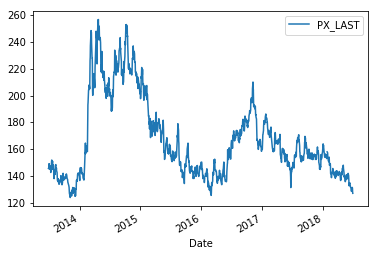

In [7]:
Price_DF.plot(x='Date', y='PX_LAST')
plt.savefig('coffee_price.png')
plt.show()

In [8]:
Price_DF.fillna(method='bfill', inplace=True)

In [9]:
Auto_Corr = []
lag = []
for i in range(60):
    lag.append(i)
    Auto_Corr.append(Price_DF.loc[:,'PX_LAST'].autocorr(i))

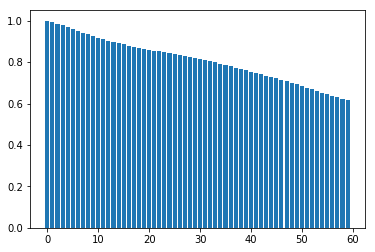

In [10]:
plt.bar(lag, Auto_Corr)
plt.show()

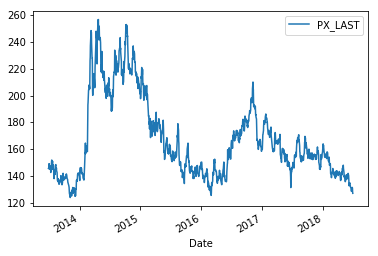

In [11]:
Price_DF.plot(x='Date', y='PX_LAST')

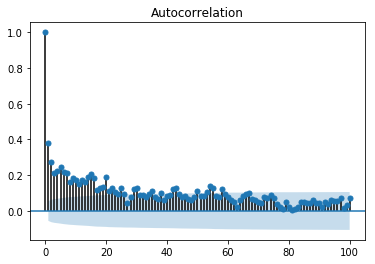

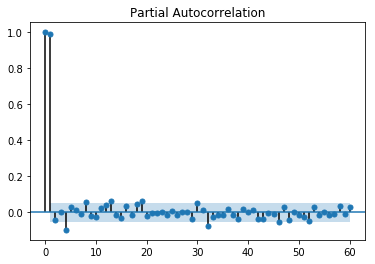

In [88]:
plot_acf(Price_DF.loc[:,'FUT_AGGTE_VOL'], lags=100)
plt.show()

plot_pacf(Price_DF.loc[:,'PX_LAST'], lags=60)
plt.show()

In [14]:
Diff_Price = Price_DF.loc[:,'PX_LAST'].diff()

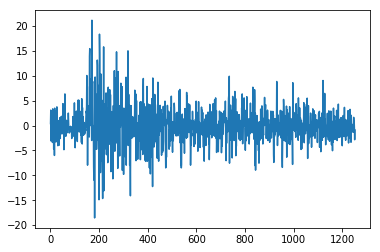

In [15]:
plt.plot(Diff_Price)
plt.show()

In [16]:
Diff_Price = Price_DF.loc[:,'PX_LAST'].apply(np.log).diff()

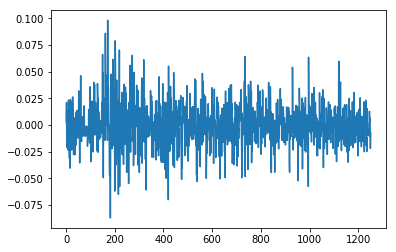

In [17]:
plt.plot(Diff_Price)
plt.show()

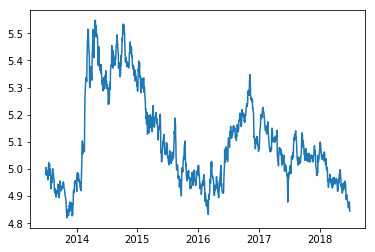

In [18]:
plt.plot(Price_DF.loc[:,'Date'], Price_DF.loc[:,'PX_LAST'].apply(np.log))
plt.show()

In [19]:
Price_t = Price_DF.loc[0:1250,'PX_LAST']
Price_t_k = Price_DF.loc[1:1251,'PX_LAST']
print(len(Price_t))
print(len(Price_t_k))

1251
1251


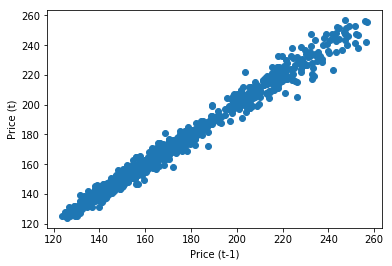

In [20]:
plt.scatter(Price_t_k, Price_t)
plt.xlabel('Price (t-1)')
plt.ylabel('Price (t)')
plt.show()

In [21]:
Price_t = Price_DF.iloc[30:,1]
Price_t_k = Price_DF.iloc[:-30,1]
print(len(Price_t))
print(len(Price_t_k))

1222
1222


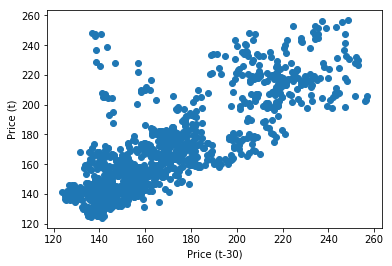

In [22]:
plt.scatter(Price_t_k, Price_t)
plt.xlabel('Price (t-30)')
plt.ylabel('Price (t)')
plt.show()

In [23]:
Price_t = Price_DF.iloc[60:, 1]
Price_t_k = Price_DF.iloc[:-60, 1]
print(len(Price_t))
print(len(Price_t_k))

1192
1192


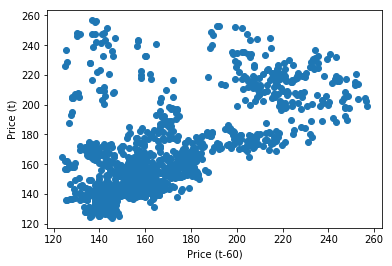

In [24]:
plt.scatter(Price_t_k, Price_t)
plt.xlabel('Price (t-60)')
plt.ylabel('Price (t)')
plt.show()


In [25]:
Price_DF.set_index('Date', inplace=True)

In [26]:
Price = Price_DF['PX_LAST'].to_frame()

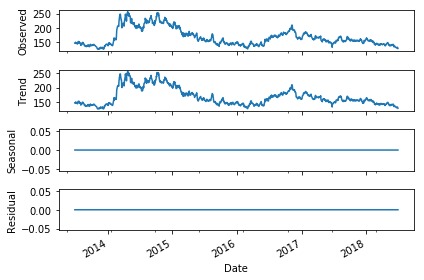

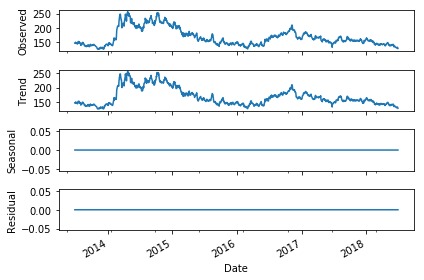

In [27]:
result = seasonal_decompose(Price, freq=1, model='additive')
result.plot()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



                             ARIMA Model Results                              
Dep. Variable:        D.FUT_AGGTE_VOL   No. Observations:                 1251
Model:                ARIMA(10, 1, 1)   Log Likelihood               -9089.497
Method:                       css-mle   S.D. of innovations            345.372
Date:                Tue, 03 Jul 2018   AIC                          18204.994
Time:                        05:46:04   BIC                          18271.706
Sample:                    07-01-2013   HQIC                         18230.072
                         - 06-29-2018                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.3148      0.067     -4.681      0.000      -0.447      -0.183
ar.L1.D.FUT_AGGTE_VOL      0.2578      0.028      9.118      0.000       0.202       0.313
ar.L

/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



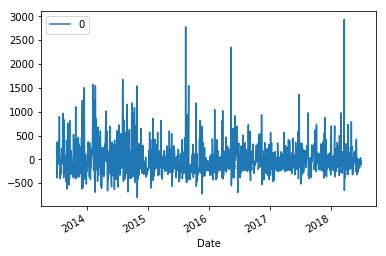

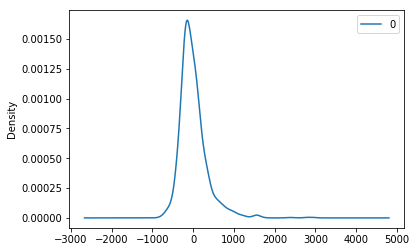

                 0
count  1251.000000
mean      4.680862
std     346.251728
min    -798.109210
25%    -200.936592
50%     -63.000700
75%     124.473108
max    2935.944774


In [28]:

model = ARIMA(Price_DF.iloc[:,1], order=(10,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [29]:

X = Price_DF.iloc[:,0].values

size = int(len(X)-365)
train, test = X[0:size], X[size:len(X)]

model = ARIMA(train, order=(10,0,1))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
start_index = len(train)-10
end_index = start_index + 30
forecast = model_fit.forecast(steps=365)

len(forecast)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.

3

Test MSE: 507.068


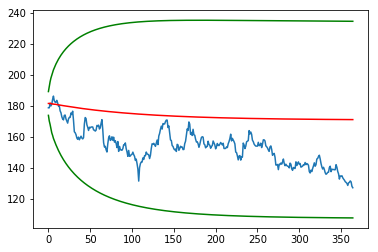

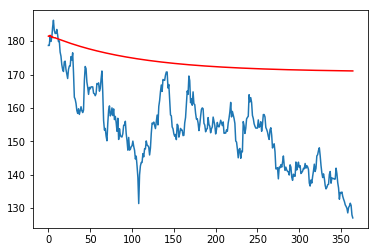

In [30]:
error = mean_squared_error(test, forecast[0])
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(forecast[0], color='red')
plt.plot(forecast[2], color='green')
plt.show()

plt.plot(test)
plt.plot(forecast[0], color='red')
plt.show()

In [31]:
path = '../Resources/Data/Weather_data/'
files = ['weather_data_Jakarta_2013_2018.csv',
         'weather_data_Nha Trang,vietnam_2013_2018.csv',
         'weather_data_Sao Paulo_2013_2018.csv',
         'weather_data_Awasa_2013_2018.csv'
        ]
cities = ['Jakarta', 'Nha_Trang', 'Sao_Paulo', 'Awasa']
Weather_DF = pd.read_csv(path+'weather_data_Cali_2013_2018.csv')
Weather_DF['Date'] = Weather_DF['Date'].astype('datetime64')
Weather_DF.set_index('Date', inplace=True)
Weather_DF.drop(columns='Unnamed: 0', inplace=True)
Weather_DF.rename(columns={'Max Temperature C': 'MaxT_Cali',
                           'Min Temperature C': 'MinT_Cali',
                           'Precipitation Total': 'Precip_Cali',
                           'Humidity Avg': 'Humid_Cali'
                          },
                  inplace=True
                 )

for i in range(len(files)):
    aDF = pd.read_csv(path+files[i])
    
    aDF['Date'] = aDF['Date'].astype('datetime64')
    aDF.set_index('Date', inplace=True)
    aDF.drop(columns='Unnamed: 0', inplace=True)
    aDF.rename(columns={'Max Temperature C': 'MaxT_'+cities[i],
                       'Min Temperature C': 'MinT_'+cities[i],
                       'Precipitation Total': 'Precip_'+cities[i],
                       'Humidity Avg': 'Humid_'+cities[i]
                       },
              inplace=True
             )
    
    Weather_DF = Weather_DF.merge(aDF, left_index=True, right_index=True)

Weather_DF.head()

,MaxT_Cali,MinT_Cali,Precip_Cali,Humid_Cali,MaxT_Jakarta,MinT_Jakarta,Precip_Jakarta,Humid_Jakarta,MaxT_Nha_Trang,MinT_Nha_Trang,Precip_Nha_Trang,Humid_Nha_Trang,MaxT_Sao_Paulo,MinT_Sao_Paulo,Precip_Sao_Paulo,Humid_Sao_Paulo,MaxT_Awasa,MinT_Awasa,Precip_Awasa,Humid_Awasa
Date,,,,,,,,,,,,,,,,,,,,
2013-01-01,29,16,1.2,81.875,31,27,1.8,75.875,26,22,0.8,82.250,28,20,2.2,87.250,26,8,0.0,39.750
2013-01-02,29,15,1.3,79.750,32,25,5.7,79.625,27,23,0.3,81.125,22,18,15.2,97.375,26,8,0.0,35.625
2013-01-03,29,17,0.9,82.750,33,25,5.2,80.625,26,22,2.9,86.625,21,18,3.8,96.500,26,7,0.0,40.625
2013-01-04,30,16,0.7,80.750,33,26,16.4,78.250,27,23,1.7,81.875,24,19,2.4,94.625,27,8,0.0,54.750
2013-01-05,30,16,2.0,81.125,31,26,31.8,82.875,26,23,12.1,84.500,29,20,7.5,88.000,26,9,0.0,52.125


In [32]:
Combined_DF = Weather_DF.merge(Price_DF, left_index=True, right_index=True)

In [33]:
Combined_DF

,MaxT_Cali,MinT_Cali,Precip_Cali,Humid_Cali,MaxT_Jakarta,MinT_Jakarta,Precip_Jakarta,Humid_Jakarta,MaxT_Nha_Trang,MinT_Nha_Trang,...,MaxT_Sao_Paulo,MinT_Sao_Paulo,Precip_Sao_Paulo,Humid_Sao_Paulo,MaxT_Awasa,MinT_Awasa,Precip_Awasa,Humid_Awasa,PX_LAST,FUT_AGGTE_VOL
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-28,28,18,3.6,84.500,34,24,11.2,76.250,36,24,...,24,14,1.6,87.625,23,10,3.5,85.750,145.70,346.0
2013-07-01,29,18,1.2,81.250,34,25,6.5,76.125,34,25,...,21,16,7.6,95.500,22,11,2.7,85.500,146.10,335.0
2013-07-02,30,17,0.8,79.125,34,25,10.5,75.125,33,25,...,17,14,3.5,95.875,23,10,7.8,85.875,149.20,695.0
2013-07-03,29,17,1.1,80.000,31,26,8.5,81.000,33,25,...,21,13,0.2,90.875,22,11,3.7,85.375,146.10,532.0
2013-07-04,29,17,1.0,82.750,30,25,7.3,81.375,33,25,...,26,12,0.0,88.750,23,10,3.2,82.875,145.05,110.0
2013-07-05,30,15,0.8,77.875,30,25,17.1,81.375,34,25,...,28,13,0.0,84.750,22,12,1.8,82.875,145.45,483.0
2013-07-08,32,17,0.6,75.000,35,24,0.2,73.125,33,24,...,18,15,2.5,95.750,23,10,6.1,85.125,147.55,299.0
2013-07-10,30,16,2.0,74.000,32,25,13.9,79.875,32,25,...,22,15,0.4,91.500,20,13,3.1,88.125,145.15,425.0
2013-07-11,29,16,1.8,82.125,33,24,2.5,76.250,33,25,...,22,14,0.4,87.875,22,11,3.0,85.000,146.00,776.0


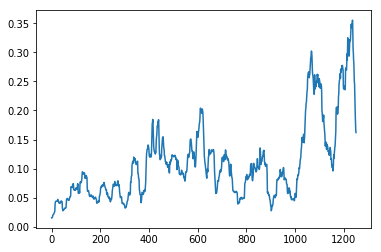

In [34]:
N=30
x = Combined_DF.loc[:,'Precip_Cali'] / Combined_DF.loc[:,'Precip_Cali'].max()
y1 = np.convolve(x, np.ones((N,))/N, mode='same')

plt.plot(y1)
plt.show()

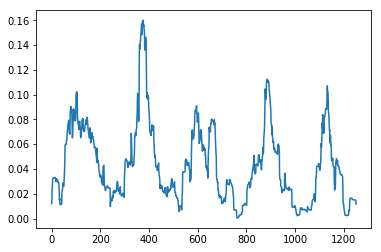

In [35]:
N=30
x = Combined_DF.loc[:,'Precip_Sao_Paulo'] / Combined_DF.loc[:,'Precip_Sao_Paulo'].max()
y2 = np.convolve(x, np.ones((N,))/N, mode='same')

plt.plot(y2)
plt.show()

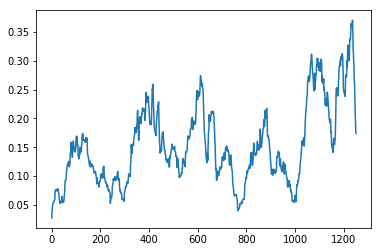

In [36]:
y = y1 + y2
plt.plot(y)
plt.show()

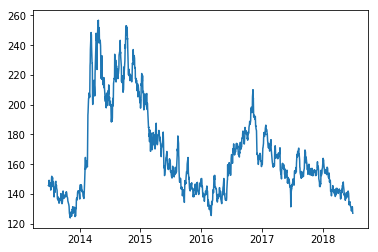

In [37]:
plt.plot(Combined_DF['PX_LAST'])
plt.show()

In [38]:
Combined_DF.shape

(1251, 22)

In [272]:
#features = np.empty(Combined_DF.iloc[:,:-2].shape)
#for i in range(20):
#    N=10
#    x = Combined_DF.iloc[:,i].values
#    features[:,i] = np.convolve(x, np.ones((N,))/N, mode='same')
features = Combined_DF.iloc[:,:-2]
target = Combined_DF.loc[:, 'PX_LAST'].values

In [280]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
T = len(features_standardized)-365
FS_train, FS_test = features_standardized[:T,:], features_standardized[T:,:]
T_train, T_test = target[:T], target[T:]
FS_train = FS_train[:]
FS_test = FS_test[:]
T_train = T_train[:]
T_test = T_test[:]
regression1 = Ridge(alpha=2)
regression2 = Lasso(alpha=2)
regression3 = HuberRegressor(epsilon=1.35, alpha=2)
model1 = regression1.fit(FS_train, T_train)
model2 = regression2.fit(FS_train, T_train)
model3 = regression3.fit(FS_train, T_train)

In [281]:
coef = model1.coef_
predictors = Combined_DF.columns.values[:-2]
pred_coef1_df = pd.DataFrame({'Predictors': predictors, 'Coeficients': coef})
pred_coef1_df

,Predictors,Coeficients
0,MaxT_Cali,-4.380934
1,MinT_Cali,3.528336
2,Precip_Cali,3.334026
3,Humid_Cali,-9.325878
4,MaxT_Jakarta,4.816618
5,MinT_Jakarta,-1.885032
6,Precip_Jakarta,0.416625
7,Humid_Jakarta,15.774070
8,MaxT_Nha_Trang,11.231528
9,MinT_Nha_Trang,-0.651700


In [282]:
coef = model2.coef_
predictors = Combined_DF.columns.values[:-2]
pred_coef2_df = pd.DataFrame({'Predictors': predictors, 'Coeficients': coef})
pred_coef2_df

,Predictors,Coeficients
0,MaxT_Cali,0.000000
1,MinT_Cali,0.052357
2,Precip_Cali,0.000000
3,Humid_Cali,-1.013223
4,MaxT_Jakarta,0.664877
5,MinT_Jakarta,-0.000000
6,Precip_Jakarta,0.000000
7,Humid_Jakarta,9.510479
8,MaxT_Nha_Trang,3.803032
9,MinT_Nha_Trang,-0.000000


In [283]:
coef = model3.coef_
predictors = Combined_DF.columns.values[:-2]
pred_coef3_df = pd.DataFrame({'Predictors': predictors, 'Coeficients': coef})
pred_coef3_df

,Predictors,Coeficients
0,MaxT_Cali,-2.768124
1,MinT_Cali,2.987456
2,Precip_Cali,2.492481
3,Humid_Cali,-7.962562
4,MaxT_Jakarta,4.303106
5,MinT_Jakarta,-1.724279
6,Precip_Jakarta,1.001417
7,Humid_Jakarta,13.542300
8,MaxT_Nha_Trang,10.434887
9,MinT_Nha_Trang,0.103662


In [284]:
print(model1.score(FS_test, T_test))
print(model2.score(FS_test, T_test))
print(model3.score(FS_test, T_test))

-1.4372029229739096
-0.5253679450468098
-1.2170384959951623


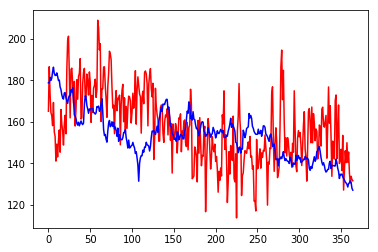

340.02722030610624


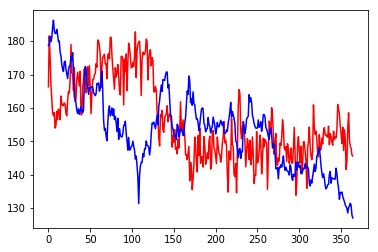

212.81224366226337


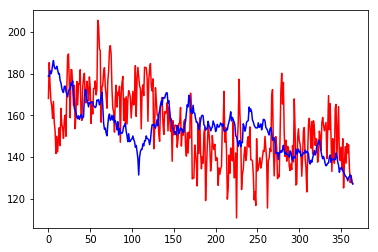

309.31090308434506


In [290]:
pr1 = model1.predict(FS_test)
plt.plot(pr1, color='red')
plt.plot(T_test, color='blue')
plt.show()
error = mean_squared_error(T_test, pr1)
print(error)
pr2 = model2.predict(FS_test)
plt.plot(pr2, color='red')
plt.plot(T_test, color='blue')
plt.show()
error = mean_squared_error(T_test, pr2)
print(error)
pr3 = model3.predict(FS_test)
plt.plot(pr3, color='red')
plt.plot(T_test, color='blue')
plt.show()
error = mean_squared_error(T_test, pr3)
print(error)

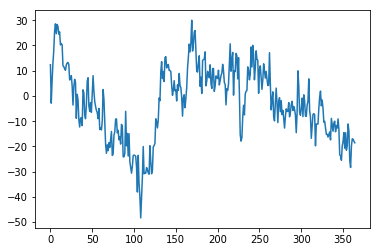

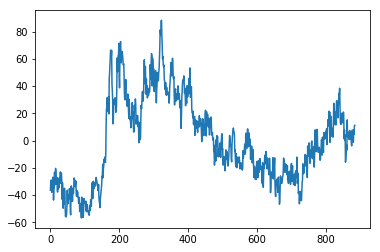

In [291]:
residuals_test = T_test - pr2
pr = model2.predict(FS_train)
residuals_train = T_train - pr
plt.plot(residuals_test)
plt.show()
plt.plot(residuals_train)

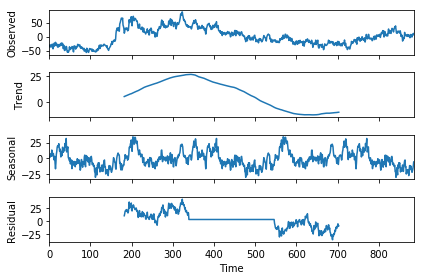

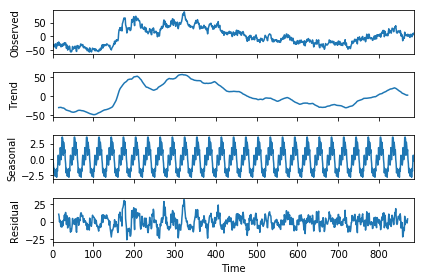

In [292]:
result = seasonal_decompose(residuals_train, freq=365, model='additive')
result.plot()
plt.show()
result = seasonal_decompose(residuals_train, freq=30, model='additive')
result.plot()
plt.show()

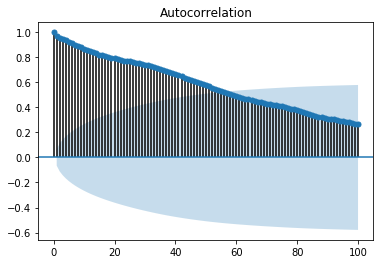

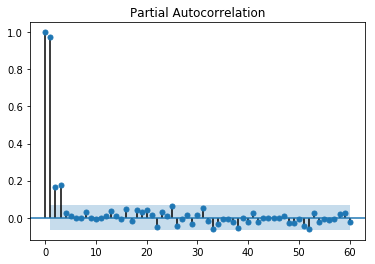

In [293]:
plot_acf(residuals_train, lags=100)
plt.show()

plot_pacf(residuals_train, lags=60)
plt.show()

In [308]:
X = residuals_train

size = int(len(X)-365)
train, test = X[0:size], X[size:len(X)]

model = ARIMA(train, order=(10,1,3))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
start_index = len(train)-10
end_index = start_index + 30
forecast = model_fit.forecast(steps=365)

len(forecast)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalma

3

Test MSE: 505.041


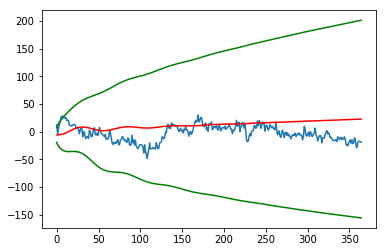

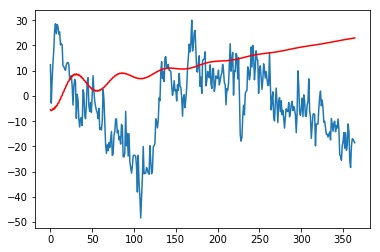

In [309]:
error = mean_squared_error(residuals_test, forecast[0])
print('Test MSE: %.3f' % error)
# plot
plt.plot(residuals_test)
plt.plot(forecast[0], color='red')
plt.plot(forecast[2], color='green')
plt.show()

plt.plot(residuals_test)
plt.plot(forecast[0], color='red')
plt.show()

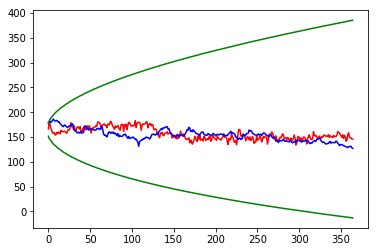

212.81224366226337

In [304]:
pr = model2.predict(FS_test)

plt.plot(pr, color='red')
plt.plot(T_test, color='blue')
plt.plot(forecast[2]+170, color='green')
plt.show()
error = mean_squared_error(T_test, pr)
error